In [284]:
import re
from Levenshtein import distance
# opencv
import cv2
# ocr engine
import pytesseract
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [285]:
import matplotlib.pyplot as plt

In [286]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [287]:
def leven_amount(txt):
 
    amount_str_ls = re.findall('(?<!Tax )(?<!Sub)(?<!Sub )(Total[^0-9]{1,30}[0-9,]*\.\d\d)', txt, re.IGNORECASE)
    amount_df = amount_checker(amount_str_ls,"Total: USD \$%d.%d".lower())
    
    balance_str_ls = re.findall('(?<!Previous )(?<!Prior )(?<!Ending )(?<!Past Due )(Balance[^0-9]{1,30}[0-9,]*\.\d\d)', txt, re.IGNORECASE)
    balance_df = amount_checker(balance_str_ls,"Balance due: USD \$%d.%d".lower())

    due_str_ls = re.findall('(Amount Due[^0-9]{1,30}[0-9,]*\.\d\d)', txt, re.IGNORECASE)
    due_df = amount_checker(due_str_ls,"Amount due: USD \$%d.%d".lower())

    # add a column for each one above
    if len(amount_df) !=0:
        amount_df.loc[:,"Criteria"] = "Amount"
    if len(balance_df) !=0:
        balance_df.loc[:,"Criteria"] = "Balance"
    if len(due_df) !=0:
        due_df.loc[:,"Criteria"] = "Due"
    
    # append them all
    df = amount_df.append([balance_df,due_df])
    

    return df
    

In [288]:
def amount_checker(regex_findall,distance_str):

    counter = 0
    
    df = pd.DataFrame(columns=['string','amount','rating'])
    
    for ind, item in enumerate(regex_findall):
        if ('tax' in item.lower()) or ('last' in item.lower()):
            del regex_findall[ind]
        else:
            amount = re.search('[0-9]{1,15}.{1,15}[0-9]{2}',item)
            
            if amount is not None:
            
                rating = distance(distance_str, item.lower())

                amount = amount.group(0).replace(',','')
                
                # record it in the dataframe
                df.loc[counter] = [item,amount,rating]
                df[['amount','rating']] = df.loc[:,['amount','rating']].astype(float)
                
                # if the amount is 0, we drop it. It's false.
                df = df[df['amount'] != 0]
                counter += 1

    return df[['string','amount']]

# ----------------------------------------

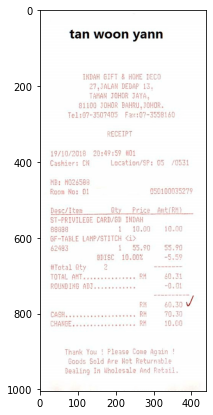

In [118]:
img = cv2.imread('C:/Users/JanithaPrathapa/Desktop/Mini Hackethon Janitha/1.jpeg')
plt.subplots(figsize = (20,7))
plt.imshow(img)

In [119]:
img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_blur = cv2.GaussianBlur(img2,(5,5),0)

cv2.threshold(img,127,255,cv2.THRESH_BINARY)

text = pytesseract.image_to_string(img_blur)

text

leven_amount(text)

,string,amount,Criteria
0,TOTAL ANTscccavccvcreces RM 60.31,60.31,Amount


# ------------------------------------------------

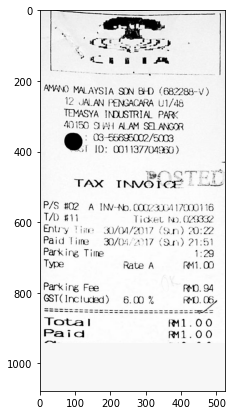

In [120]:
img = cv2.imread('C:/Users/JanithaPrathapa/Desktop/Mini Hackethon Janitha/4.jpeg')
plt.subplots(figsize = (20,7))
plt.imshow(img)

In [121]:
img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_blur = cv2.GaussianBlur(img2,(5,5),0)

cv2.threshold(img,127,255,cv2.THRESH_BINARY)

text = pytesseract.image_to_string(img_blur)

text

leven_amount(text)

,string,amount,Criteria
0,Total fa¥1.00,1.0,Amount


# ------------------------------------

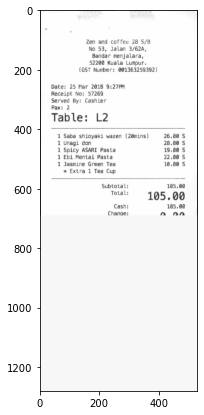

In [124]:
img = cv2.imread('C:/Users/JanithaPrathapa/Desktop/Mini Hackethon Janitha/6.jpeg')
plt.subplots(figsize = (20,7))
plt.imshow(img)

In [125]:
img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_blur = cv2.GaussianBlur(img2,(5,5),0)

cv2.threshold(img,127,255,cv2.THRESH_BINARY)

text = pytesseract.image_to_string(img_blur)

text

leven_amount(text)

,string,amount,Criteria
0,Total: 105.00,105.0,Amount


# --------------------------------------------

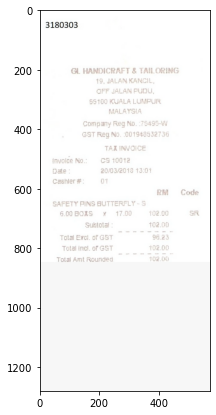

In [126]:
img = cv2.imread('C:/Users/JanithaPrathapa/Desktop/Mini Hackethon Janitha/9.jpeg')
plt.subplots(figsize = (20,7))
plt.imshow(img)

In [127]:
img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_blur = cv2.GaussianBlur(img2,(5,5),0)

cv2.threshold(img,127,255,cv2.THRESH_BINARY)

text = pytesseract.image_to_string(img_blur)

text

leven_amount(text)

,string,amount,Criteria
0,Total incl. of GST 102.00,102.0,Amount


# -----------------------------------------

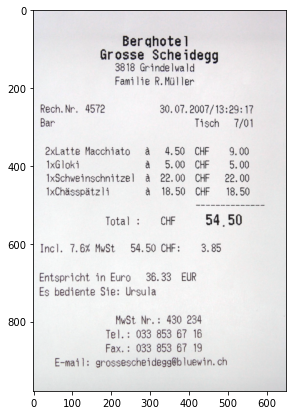

In [128]:
img = cv2.imread('C:/Users/JanithaPrathapa/Desktop/Mini Hackethon Janitha/19.png')
plt.subplots(figsize = (20,7))
plt.imshow(img)

In [129]:
img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_blur = cv2.GaussianBlur(img2,(5,5),0)

cv2.threshold(img,127,255,cv2.THRESH_BINARY)

text = pytesseract.image_to_string(img_blur)

text

leven_amount(text)

,string,amount,Criteria
0,Total : CHF 54.50,54.5,Amount


# -----------------------------------------

# Final Output

In [291]:
resDict={}
for i in range(601,627):
    img = cv2.imread('C:/Users/JanithaPrathapa/Downloads/ICDS-Mini-Hackathon-2021-main/evaluation-set/{0:03}.jpg'.format(i))
   # plt.subplots(figsize = (20,7))
    #plt.imshow(img)
    img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img_blur = cv2.GaussianBlur(img2,(5,5),0)

    cv2.threshold(img,127,255,cv2.THRESH_BINARY)

    text = pytesseract.image_to_string(img_blur)
    vb=leven_amount(text)
    if (not vb.empty):
        resDict['{0:03}'.format(i)]=vb['amount'][0]

In [292]:
resDict

{'601': 27.9,
 '602': 82.6,
 '603': 180.0,
 '604': 115.0,
 '605': 168.0,
 '606': 1.2,
 '607': 381.5,
 '608': 153.5,
 '609': 65.0,
 '610': 85.2,
 '612': 489.3,
 '617': 59.0,
 '618': 35.0,
 '619': 82.5,
 '620': 58.0,
 '621': 148.5,
 '622': 36.0,
 '623': 179.5,
 '624': 95.23,
 '625': 12.0,
 '626': 750.0}

In [293]:
df=pd.DataFrame(resDict.values(),resDict.keys())
df=pd.DataFrame(columns=['file_name','Total'])
df['file_name']=resDict.keys()
df['Total']=resDict.values()

In [294]:
df

,file_name,Total
0,601,27.90
1,602,82.60
2,603,180.00
3,604,115.00
4,605,168.00
5,606,1.20
6,607,381.50
7,608,153.50
8,609,65.00
9,610,85.20
